In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [54]:
matches = pd.read_csv("matches_5yr.csv", index_col = 0)
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham,...,Match Report,NaN,13.0,1.0,18.7,1.0,1.0,1.0,2022,Manchester City
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,...,Match Report,NaN,19.0,7.0,17.5,0.0,0.0,0.0,2022,Manchester City
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle Utd,...,Match Report,NaN,21.0,10.0,16.2,1.0,0.0,0.0,2022,Manchester City
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,...,Match Report,NaN,18.0,5.0,14.1,0.0,0.0,0.0,2022,Manchester City
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,Nott'ham Forest,...,Match Report,NaN,17.0,9.0,14.8,0.0,0.0,0.0,2022,Manchester City


In [55]:
print(f"Number of matches recorded in the data: {matches.shape[0]}")
print(f"Number of matches played during the two seasons, 2020-21 and 2021-22: {38*20*5}")

Number of matches recorded in the data: 3800
Number of matches played during the two seasons, 2020-21 and 2021-22: 3800


In [56]:
# there are several matches missing
print(matches["team"].value_counts())
print(matches["opponent"].value_counts())

Manchester City             190
Crystal Palace              190
Southampton                 190
Leicester City              190
Everton                     190
Arsenal                     190
Wolverhampton Wanderers     190
Chelsea                     190
West Ham United             190
Manchester United           190
Tottenham Hotspur           190
Brighton and Hove Albion    190
Liverpool                   190
Newcastle United            190
Aston Villa                 152
Burnley                     152
Fulham                      114
Watford                     114
Leeds United                114
Bournemouth                 114
Brentford                    76
Norwich City                 76
Sheffield United             76
Nottingham Forest            38
West Bromwich Albion         38
Cardiff City                 38
Huddersfield Town            38
Name: team, dtype: int64
West Ham           190
Liverpool          190
Manchester City    190
Arsenal            190
Tottenham          

In [57]:
name_diff = {
    "Wolves": "Wolverhampton Wanderers",
    "West Ham": "West Ham United",
    "Tottenham": "Tottenham Hotspur",
    "Brighton": "Brighton and Hove Albion",
    "Newcastle Utd": "Newcastle United",
    "Sheffield Utd": "Sheffield United",
    "Nott'ham Forest": "Nottingham Forest",
    "West Brom": "West Bromwich Albion",
    "Huddersfield": "Huddersfield Town",
    "Manchester Utd": "Manchester United"
}

matches["opponent"] = matches["opponent"].replace(name_diff)
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham United,...,Match Report,NaN,13.0,1.0,18.7,1.0,1.0,1.0,2022,Manchester City
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,...,Match Report,NaN,19.0,7.0,17.5,0.0,0.0,0.0,2022,Manchester City
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle United,...,Match Report,NaN,21.0,10.0,16.2,1.0,0.0,0.0,2022,Manchester City
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,...,Match Report,NaN,18.0,5.0,14.1,0.0,0.0,0.0,2022,Manchester City
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,Nottingham Forest,...,Match Report,NaN,17.0,9.0,14.8,0.0,0.0,0.0,2022,Manchester City


In [58]:
teams = np.array(matches["team"].unique())
team_codes = {team:code for code,team in enumerate(teams)}
team_codes

{'Manchester City': 0,
 'Arsenal': 1,
 'Manchester United': 2,
 'Newcastle United': 3,
 'Liverpool': 4,
 'Brighton and Hove Albion': 5,
 'Aston Villa': 6,
 'Tottenham Hotspur': 7,
 'Brentford': 8,
 'Fulham': 9,
 'Crystal Palace': 10,
 'Chelsea': 11,
 'Wolverhampton Wanderers': 12,
 'West Ham United': 13,
 'Bournemouth': 14,
 'Nottingham Forest': 15,
 'Everton': 16,
 'Leicester City': 17,
 'Leeds United': 18,
 'Southampton': 19,
 'Burnley': 20,
 'Watford': 21,
 'Norwich City': 22,
 'West Bromwich Albion': 23,
 'Sheffield United': 24,
 'Cardiff City': 25,
 'Huddersfield Town': 26}

##### Adding team ratings from FIFA 21

In [59]:
fifa21 = pd.read_csv('teams_fifa21.csv')
fifa21.head(2)

,ID,Name,League,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
0,1,Arsenal,English Premier League (1),13,80,83,79,79,80000000,7,7,33,24.7,23.6
1,2,Aston Villa,English Premier League (1),13,77,77,77,77,37500000,2,2,29,24.2,24.0


In [60]:
fifa21["Name"] = fifa21["Name"].replace("Brighton & Hove Albion", "Brighton and Hove Albion")
fifa_rating = fifa21[fifa21["Name"].isin(teams)]
fifa_dict = dict(zip(fifa_rating["Name"], fifa_rating["Overall"]))
fifa_dict

{'Arsenal': 80,
 'Aston Villa': 77,
 'Brighton and Hove Albion': 75,
 'Burnley': 76,
 'Chelsea': 82,
 'Crystal Palace': 76,
 'Everton': 79,
 'Fulham': 75,
 'Leeds United': 76,
 'Leicester City': 80,
 'Liverpool': 85,
 'Manchester City': 85,
 'Manchester United': 82,
 'Newcastle United': 76,
 'Sheffield United': 73,
 'Southampton': 76,
 'Tottenham Hotspur': 82,
 'West Bromwich Albion': 73,
 'West Ham United': 78,
 'Wolverhampton Wanderers': 79,
 'Bournemouth': 74,
 'Brentford': 72,
 'Cardiff City': 71,
 'Huddersfield Town': 69,
 'Norwich City': 73,
 'Nottingham Forest': 71,
 'Watford': 74}

In [61]:
matches["team_rating"] = matches["team"].map(fifa_dict)
matches["opp_rating"] = matches["opponent"].map(fifa_dict)
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sh,sot,dist,fk,pk,pkatt,season,team,team_rating,opp_rating
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham United,...,13.0,1.0,18.7,1.0,1.0,1.0,2022,Manchester City,85,78
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,...,19.0,7.0,17.5,0.0,0.0,0.0,2022,Manchester City,85,74
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle United,...,21.0,10.0,16.2,1.0,0.0,0.0,2022,Manchester City,85,76
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,...,18.0,5.0,14.1,0.0,0.0,0.0,2022,Manchester City,85,76
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,Nottingham Forest,...,17.0,9.0,14.8,0.0,0.0,0.0,2022,Manchester City,85,71


In [62]:
print(matches["team_rating"].isna().sum())
print(matches["opp_rating"].isna().sum())

0
0


## Data Cleaning

In [63]:
matches.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
team_rating       int64
opp_rating        int64
dtype: object

In [64]:
matches["date"] = pd.to_datetime(matches["date"])
matches["hours"], matches["mins"] = matches["time"].str.split(':').str
matches["hours"] = matches["hours"].astype(int)
matches["mins"] = matches["mins"].astype(int)
matches["time"] = matches["hours"] + (matches["mins"] / 60)

matches.drop(columns = ["hours", "mins"], axis = 1, inplace=True)

matches.head()

/var/folders/7c/hrfvxk255v9380ftp59vb0dw0000gn/T/ipykernel_85212/2703010416.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  matches["hours"], matches["mins"] = matches["time"].str.split(':').str


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sh,sot,dist,fk,pk,pkatt,season,team,team_rating,opp_rating
1,2022-08-07,16.5,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham United,...,13.0,1.0,18.7,1.0,1.0,1.0,2022,Manchester City,85,78
2,2022-08-13,15.0,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,...,19.0,7.0,17.5,0.0,0.0,0.0,2022,Manchester City,85,74
3,2022-08-21,16.5,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle United,...,21.0,10.0,16.2,1.0,0.0,0.0,2022,Manchester City,85,76
4,2022-08-27,15.0,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,...,18.0,5.0,14.1,0.0,0.0,0.0,2022,Manchester City,85,76
5,2022-08-31,19.5,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,Nottingham Forest,...,17.0,9.0,14.8,0.0,0.0,0.0,2022,Manchester City,85,71


In [65]:
matches["venue_code"] = matches["venue"].astype("category").cat.codes # Home and away
matches["team_code"] = matches["team"].map(team_codes)
matches["opp_code"] = matches["opponent"].map(team_codes) # Converting opponents into categorical codes
matches["form_code"] = matches["formation"].astype('category').cat.codes
matches["day_code"] = matches["date"].dt.dayofweek # Numbering days of the week 0-6
matches.sort_values(by='date', inplace=True)
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pkatt,season,team,team_rating,opp_rating,venue_code,team_code,opp_code,form_code,day_code
0,2018-08-10,20.0,Premier League,Matchweek 1,Fri,Home,W,2.0,1.0,Leicester City,...,1.0,2018,Manchester United,82,80,1,2,17,15,4
0,2018-08-10,20.0,Premier League,Matchweek 1,Fri,Away,L,1.0,2.0,Manchester United,...,0.0,2018,Leicester City,80,82,0,17,2,12,4
0,2018-08-11,15.0,Premier League,Matchweek 1,Sat,Home,L,0.0,2.0,Crystal Palace,...,0.0,2018,Fulham,75,76,1,9,10,15,5
0,2018-08-11,15.0,Premier League,Matchweek 1,Sat,Home,L,0.0,3.0,Chelsea,...,0.0,2018,Huddersfield Town,69,82,1,26,11,6,5
0,2018-08-11,15.0,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Fulham,...,0.0,2018,Crystal Palace,76,75,0,10,9,17,5


In [66]:
matches.index = range(matches.shape[0]) # Fixing the index
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pkatt,season,team,team_rating,opp_rating,venue_code,team_code,opp_code,form_code,day_code
0,2018-08-10,20.0,Premier League,Matchweek 1,Fri,Home,W,2.0,1.0,Leicester City,...,1.0,2018,Manchester United,82,80,1,2,17,15,4
1,2018-08-10,20.0,Premier League,Matchweek 1,Fri,Away,L,1.0,2.0,Manchester United,...,0.0,2018,Leicester City,80,82,0,17,2,12,4
2,2018-08-11,15.0,Premier League,Matchweek 1,Sat,Home,L,0.0,2.0,Crystal Palace,...,0.0,2018,Fulham,75,76,1,9,10,15,5
3,2018-08-11,15.0,Premier League,Matchweek 1,Sat,Home,L,0.0,3.0,Chelsea,...,0.0,2018,Huddersfield Town,69,82,1,26,11,6,5
4,2018-08-11,15.0,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Fulham,...,0.0,2018,Crystal Palace,76,75,0,10,9,17,5


In [67]:
labels = ['Draw', 'Loss', 'Win']
labels_dict = {
    0:'Draw',
    1:'Loss',
    2:'Win'
}
matches["target"] = matches["result"].astype("category").cat.codes # Win = 2, Loss = 1, Draw = 0
matches[["result", "target"]].sample(10)

,result,target
1309,L,1
3261,L,1
3641,L,1
2190,L,1
2973,W,2
3309,L,1
299,L,1
995,W,2
1138,L,1
2712,D,0


## Building the first iteration of Random Forest Model

In [68]:
matches.index = range(matches.shape[0])
matches = matches.fillna(method='ffill')
#matches["target"] = (matches["result"] == "W").astype("int")

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=17)

#train test val split
train = matches[matches["date"] <= "2022-09-30"]
val = matches[(matches["date"] > "2022-09-30") & (matches["date"] <= "2023-01-31")]
test = matches[matches["date"] >= "2023-01-31"]

# selecting model parameters
predictors = [
    'team_code',
    'time',
    'form_code',
    'venue_code',
    'opp_code',
    'day_code'
]

In [70]:
print(len(train), len(val), len(test))

3174 264 362


Fitting our random forest on training data

In [71]:
X_train = train[predictors].values
y_train = train['target'].values

rf.fit(X=X_train, y=y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=17)

In [72]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix

In [73]:
y_pred = rf.predict(val[predictors].values)
y_val = val['target'].values
print(f'Accuracy: {accuracy_score(y_val, y_pred):.3f}')
print(f'F1 Score: {f1_score(y_val, y_pred, average = "weighted"):.3f}')
print(f'Precision: {precision_score(y_val, y_pred, average = "weighted"):.3f}')

Accuracy: 0.523
F1 Score: 0.488
Precision: 0.477


In [74]:
output = rf.predict(test[predictors].values)
y_test = test['target'].values
print(f'Accuracy: {accuracy_score(y_test, output):.3f}')
print(f'F1 Score: {f1_score(y_test, output, average = "weighted"):.3f}')
print(f'Precision: {precision_score(y_test, output, average = "weighted"):.3f}')

Accuracy: 0.511
F1 Score: 0.476
Precision: 0.478


<Axes: >

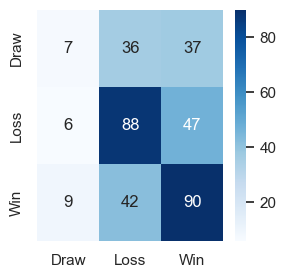

In [75]:
cf_matrix = confusion_matrix(y_test, output)
sns.set(rc={'figure.figsize':(3,3)})
sns.heatmap(cf_matrix, cmap='Blues', annot=True, fmt=".0f", xticklabels=labels, yticklabels=labels)

### Applying rolling averages to measure past performance

In [76]:
grouped_matches = matches.groupby("team")
group = grouped_matches.get_group("Manchester City").sort_values("date")
group

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,season,team,team_rating,opp_rating,venue_code,team_code,opp_code,form_code,day_code,target
18,2018-08-12,16.0,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,Arsenal,...,2018,Manchester City,85,80,0,0,1,12,6,2
36,2018-08-19,13.5,Premier League,Matchweek 2,Sun,Home,W,6.0,1.0,Huddersfield Town,...,2018,Manchester City,85,69,1,0,26,0,6,2
49,2018-08-25,12.5,Premier League,Matchweek 3,Sat,Away,D,1.0,1.0,Wolverhampton Wanderers,...,2018,Manchester City,85,79,0,0,12,15,5,0
72,2018-09-01,17.5,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Newcastle United,...,2018,Manchester City,85,76,1,0,3,9,5,2
80,2018-09-15,15.0,Premier League,Matchweek 5,Sat,Home,W,3.0,0.0,Fulham,...,2018,Manchester City,85,75,1,0,9,15,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,2023-05-06,15.0,Premier League,Matchweek 35,Sat,Home,W,2.0,1.0,Leeds United,...,2022,Manchester City,85,76,1,0,18,1,5,2
3747,2023-05-14,14.0,Premier League,Matchweek 36,Sun,Away,W,3.0,0.0,Everton,...,2022,Manchester City,85,79,0,0,16,12,6,2
3768,2023-05-21,16.0,Premier League,Matchweek 37,Sun,Home,W,1.0,0.0,Chelsea,...,2022,Manchester City,85,82,1,0,11,5,6,2
3776,2023-05-24,20.0,Premier League,Matchweek 32,Wed,Away,D,1.0,1.0,Brighton and Hove Albion,...,2022,Manchester City,85,75,0,0,5,15,2,0


In [77]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(10, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [78]:
cols = ["gf", "ga", "xg", "xga", "poss", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

rolling_averages(group, cols, new_cols).head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,ga_rolling,xg_rolling,xga_rolling,poss_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
214,2018-11-04,15.0,Premier League,Matchweek 11,Sun,Home,W,6.0,1.0,Southampton,...,0.3,2.61,0.46,67.5,21.0,8.0,16.62,0.9,0.0,0.1
233,2018-11-11,16.5,Premier League,Matchweek 12,Sun,Home,W,3.0,1.0,Manchester United,...,0.4,2.66,0.61,68.3,21.1,8.0,16.37,0.9,0.0,0.1
241,2018-11-24,15.0,Premier League,Matchweek 13,Sat,Away,W,4.0,0.0,West Ham United,...,0.4,2.43,0.65,67.2,19.6,7.1,16.45,0.8,0.0,0.1
267,2018-12-01,15.0,Premier League,Matchweek 14,Sat,Home,W,3.0,1.0,Bournemouth,...,0.3,2.54,0.64,67.0,18.7,7.1,15.64,0.7,0.0,0.1
286,2018-12-04,20.0,Premier League,Matchweek 15,Tue,Away,W,2.0,1.0,Watford,...,0.3,2.60,0.65,66.4,17.9,6.9,15.36,0.4,0.0,0.1


In [79]:
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))
matches_rolling = matches_rolling.droplevel('team')
matches_rolling.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,ga_rolling,xg_rolling,xga_rolling,poss_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
212,2018-11-03,17.500000,Premier League,Matchweek 11,Sat,Home,D,1.0,1.0,Liverpool,...,1.3,1.43,1.36,57.8,12.3,5.4,17.54,0.6,0.0,0.0
238,2018-11-11,16.500000,Premier League,Matchweek 12,Sun,Home,D,1.0,1.0,Wolverhampton Wanderers,...,1.2,1.52,1.32,59.7,12.6,5.5,17.20,0.6,0.0,0.0
254,2018-11-25,13.500000,Premier League,Matchweek 13,Sun,Away,W,2.0,1.0,Bournemouth,...,1.0,1.37,1.35,63.0,12.1,5.2,17.55,0.6,0.0,0.0
275,2018-12-02,14.083333,Premier League,Matchweek 14,Sun,Home,W,4.0,2.0,Tottenham Hotspur,...,1.0,1.35,1.30,62.7,12.4,4.6,17.44,0.5,0.0,0.0
295,2018-12-05,20.000000,Premier League,Matchweek 15,Wed,Away,D,2.0,2.0,Manchester United,...,1.0,1.45,1.32,61.4,12.8,4.0,17.56,0.5,0.1,0.1


In [80]:
#train test val split
train_rolling = matches_rolling[matches_rolling["date"] <= "2022-09-30"]
val_rolling = matches_rolling[(matches_rolling["date"] > "2022-09-30") & (matches_rolling["date"] <= "2023-01-31")]
test_rolling = matches_rolling[matches_rolling["date"] >= "2023-01-31"]

predictors_rolling = predictors + new_cols

In [81]:
# Fitting the model to our data

rf2 = RandomForestClassifier(n_estimators=500, min_samples_split=18, random_state=17, 
                             class_weight="balanced", n_jobs = 6, max_features=9)

X_trainr = train_rolling[predictors_rolling].values
y_trainr = train_rolling['target'].values

rf2.fit(X=X_trainr, y=y_trainr)

RandomForestClassifier(class_weight='balanced', max_features=9,
                       min_samples_split=18, n_estimators=500, n_jobs=6,
                       random_state=17)

In [82]:
y_predr = rf2.predict(val_rolling[predictors_rolling].values)
y_valr = val_rolling["target"].values

print(f'Accuracy: {accuracy_score(y_valr, y_predr):.3f}')
print(f'F1 Score: {f1_score(y_predr, y_valr, average = "weighted"):.3f}')
print(f'Precision: {precision_score(y_valr, y_predr, average = "weighted"):.3f}')

Accuracy: 0.506
F1 Score: 0.530
Precision: 0.470


In [83]:
outputr = rf2.predict(test_rolling[predictors_rolling].values)
y_testr = test_rolling["target"].values

print(f'Accuracy: {accuracy_score(y_testr, outputr):.3f}')
print(f'F1 Score: {f1_score(y_testr, outputr, average = "weighted"):.3f}')
print(f'Precision: {precision_score(y_testr, outputr, average = "weighted"):.3f}')

Accuracy: 0.522
F1 Score: 0.488
Precision: 0.480


<Axes: >

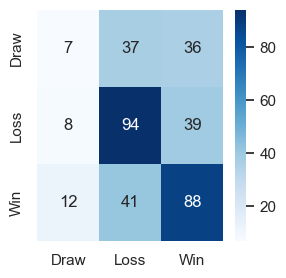

In [84]:
cf_matrix = confusion_matrix(y_testr, outputr)
sns.set(rc={'figure.figsize':(3,3)})
sns.heatmap(cf_matrix, cmap='Blues', annot=True, fmt=".0f", xticklabels=labels, yticklabels=labels)

In [85]:
import pickle

# Save the model to a file
with open('premierleague.pkl', 'wb') as file:
    pickle.dump(rf2, file)